# RADMAP Package Tutorials - Performance
--------

This notebook will show examples of how to use the RADMAP (Radar Modeling, Antenna, and Performance (Python)) package. This should allow you to gain experience with Python, Jupyter Notebooks, and radar theory.

Import required modules for this example.

In [1]:
import numpy as np
from general import power2dB
from detection import SW0_SW5
from target import Target
from antenna import Antenna
from performance import Radar
from waveform import TxWaveform

## Example 1
------------

This example is based on Budge Ch. 2.

In this example, we will set parameters for a radar system pertaining to a single waveform and calculate the SNR of that radar.

The radar parameters are as follows:
    - Transmit Power : 10 MW
    - Transmit and Receive Antenna Directivity : 6309.9 W/W
    - Transmit Waveform : 0.4 usec pulse transmitted wtih 37.5 mm wavelength
    - Target RCS : 3.98 W/W
    - Target Range : 60 km
    - Losses: 2.51 W/W
    - System Temperateure: 3423 Kelvin

In [2]:
# Create a new radar instantiation with desired parameters
radar1 = Radar(Pt=10**6, power_dB=False,
               Gt=6309.6, Gr=6309.6, g_dB=False,
               TxWfm=TxWaveform(f=3e8/0.0375, tauP=0.4e-6),
               sigmaT=3.98, tgt_sig_dB=False,
               R=60e3,
               L=2.51, l_dB=False,
               Ts=3423)

Print SNR of this scenario. This can be accessed by either the `SNR` property/attribute of the radar1 object, or it can be calulated by the `get_SNR` method, which allows for the units of the SNR to be specified.

In [3]:
print(f'The SNR of the target return is {radar1.SNR} W/W')
print(f'The SNR of the target return is {radar1.get_SNR(dB=False)} W/W')
print(f'The SNR of the target return is {radar1.get_SNR(dB=True)} dB')

The SNR of the target return is [29.22906707367932] W/W
The SNR of the target return is [29.22906707367932] W/W
The SNR of the target return is [14.65814954] dB


The same example can be reworked with input units in dB, vice ratios. It is up to the user to verify the conversion of inputs to dB.

The radar parameters are as follows:
    - Transmit Power : 10 MW / 60 dB
    - Transmit and Receive Antenna Directivity : 6309.9  W/W / 38 dB
    - Transmit Waveform : 0.4 usec pulse transmitted wtih 37.5 mm wavelength
    - Target RCS : 3.98 W/W / 6 dB
    - Target Range : 60 km
    - Losses: 2.51 W/W / 4 dB
    - System Temperateure: 3423 Kelvin

In [4]:
# Create a new radar instantiation with desired parameters
radar2 = Radar(Pt=60, power_dB=True,
               Gt=38, Gr=38, g_dB=True,
               TxWfm=TxWaveform(f=3e8/0.0375, tauP=0.4e-6),
               sigmaT=6, tgt_sig_dB=True,
               R=60e3,
               L=4, l_dB=True,
               Ts=3423)

Print SNR of this scenario. This can be accessed by either the `SNR` property/attribute of the radar1 object, or it can be calulated by the `get_SNR` method, which allows for the units of the SNR to be specified.

In [5]:
print(f'The SNR of the target return is {radar2.SNR} W/W')
print(f'The SNR of the target return is {radar2.get_SNR(dB=False)} W/W')
print(f'The SNR of the target return is {radar2.get_SNR(dB=True)} dB')

The SNR of the target return is [29.214734755308843] W/W
The SNR of the target return is [29.214734755308843] W/W
The SNR of the target return is [14.65601948] dB


These results share good agreement with the previously calculated values. The slight mismatches can be attributed to truncating the precision on the power ratio value inputs.

------------
## Example 2
------------

This example calculates and plots the SNR vs range performance curves for a radar with the following parameters:
    - Operating frequency : 10 GHz
    - Antenna Diamater : 1.5 m
    - Waveforms :
        - 10 us PW unmodulated pulse
        - 25 us PW unmodulated pulse
        - 100 us PW unmodulated pulse
    - Target : 6 dB SW0/SW5 target at 1 deg elevation with respect to the radar
    - Transmit Power : 100 kW
    - Losses : 14 dB
    - Noise Figure : 4 dB

In [6]:
# Define Antenna
Ant = Antenna(f=10e9, dim=1.5, el0=1)

# Define Waveforms to be analyzed
Wfm1 = TxWaveform(f=10e9, tauP=10e-6, T=1/2000, name='10us Unmod')
Wfm2 = TxWaveform(f=10e9, tauP=25e-6, T=1/1500, name='25us Unmod')
Wfm3 = TxWaveform(f=10e9, tauP=100e-6, T=1/1000, name='100us Unmod')
Wfm = (Wfm1, Wfm2, Wfm3)

# Define Target
Tgt = SW0_SW5(6)

# Create radar object
radar3 = Radar(Pt=power2dB(100e3), Ant=Ant, TxWfm=Wfm, sigmaT=Tgt, Fn=4, L=14)

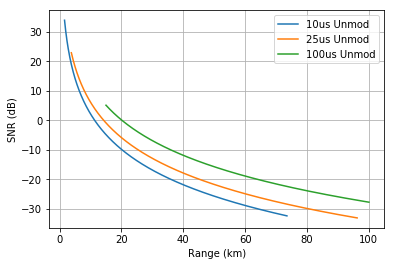

In [7]:
# Calculate RRE and plot SNR vs Range
radar3.plot_snr()

Calculate the detection range for a 20 dB target for each waveform.

In [8]:
# Calculate detection range for SNR requirement of 20 dB
print(f'Detection Range for 20 dB target = {np.round(radar3.calc_Rdet(SNR_req=20)/1000, 1)} km')

Detection Range for 20 dB target = [3.6 4.5 6.4] km


------------
## Example 3
------------

This example is based on EE619 Homework 4 in which the scenario is as follows:
    - Operating frequency : 10 GHz
    - Antenna Diamater : 1.5 m
    - Waveforms :
        - 10 us PW unmodulated pulse
    - Target : -10 dB SW0/SW5 target at 1 deg elevation with respect to the radar
    - Transmit Power : 100 kW
    - Losses : 14 dB
    - Noise Figure : 4 dB
    

In [9]:
# Define Antenna
Ant = Antenna(f=10e9, dim=1.5, el0=1)

# Define Waveforms to be analyzed
Wfm1 = TxWaveform(f=10e9, tauP=10e-6, T=1/2000, name='10us Unmod')

# Define Target
Tgt = SW0_SW5(-10)

# Calculate RRE and plot SNR vs Range
radar4 = Radar(Pt=power2dB(100e3), Ant=Ant, TxWfm=Wfm1, sigmaT=Tgt, Fn=4, L=14)

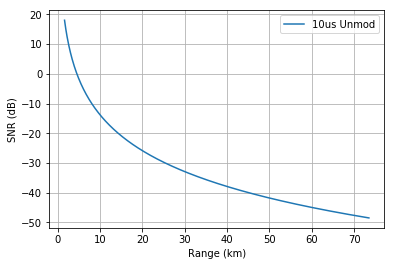

In [10]:
# Calculate RRE and plot SNR vs Range
radar4.plot_snr()

In [11]:
# Calculate detection range for SNR requirement of 20 dB
print(f'Detection Range for -10 dB target = {np.round(radar4.calc_Rdet(SNR_req=20)/1000, 1)} km')

Detection Range for -10 dB target = [1.4] km
